In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization

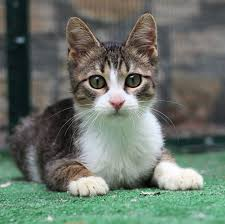

In [3]:
image_file = '/content/cat_image.jpeg'
cat_image = tf.keras.preprocessing.image.load_img(image_file)
cat_image

In [4]:
cat_image_array = tf.keras.preprocessing.image.img_to_array(cat_image)
cat_image_array

array([[[100.,  99.,  94.],
        [ 94.,  95.,  89.],
        [ 88.,  88.,  86.],
        ...,
        [ 96.,  96.,  96.],
        [ 97.,  96.,  94.],
        [102.,  98.,  95.]],

       [[100.,  99.,  94.],
        [ 94.,  95.,  89.],
        [ 87.,  88.,  83.],
        ...,
        [ 92.,  92.,  92.],
        [ 93.,  92.,  90.],
        [ 96.,  92.,  89.]],

       [[101., 100.,  95.],
        [ 95.,  96.,  90.],
        [ 88.,  89.,  84.],
        ...,
        [ 85.,  85.,  85.],
        [ 85.,  85.,  85.],
        [ 85.,  84.,  82.]],

       ...,

       [[100., 169., 124.],
        [ 95., 164., 119.],
        [ 84., 153., 108.],
        ...,
        [ 86., 157., 113.],
        [ 89., 158., 114.],
        [ 99., 163., 126.]],

       [[ 77., 149., 101.],
        [ 76., 148., 100.],
        [ 70., 139.,  94.],
        ...,
        [ 84., 153., 108.],
        [ 86., 155., 111.],
        [ 96., 160., 123.]],

       [[ 61., 133.,  85.],
        [ 67., 139.,  91.],
        [ 71., 1

In [5]:
def plot(original_image, updated_image):

  plt.figure(figsize = (16,8))
  plt.subplot(1,2,1)
  plt.title('original image')
  plt.imshow(original_image)

  plt.subplot(1,2,2)
  plt.title('updated_image')
  plt.imshow(updated_image)

  plt.show()

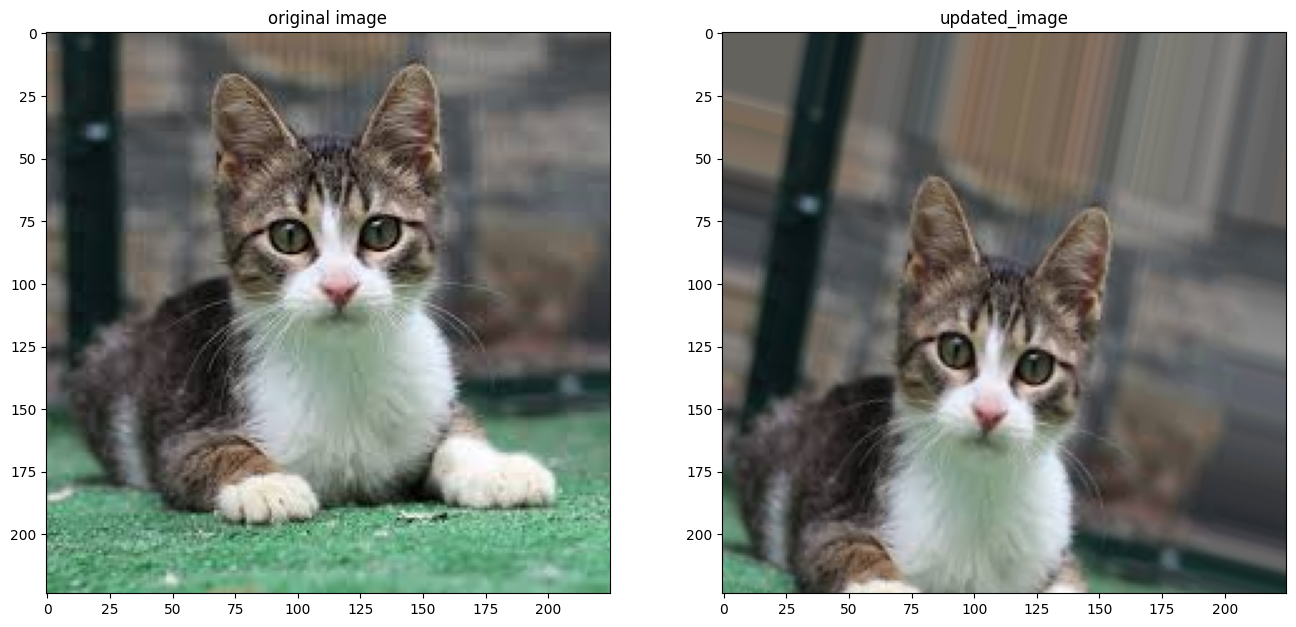

In [7]:
updated_data = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                               samplewise_center=True, featurewise_std_normalization=True,
                                                               samplewise_std_normalization=True, zca_whitening=True,
                                                               zca_epsilon=1e-06, rotation_range=25, width_shift_range=0.5,
                                                               height_shift_range=0.2, brightness_range=None,
                                                               shear_range=0.1, zoom_range=0.2, channel_shift_range=0.0,
                                                               fill_mode='nearest', cval=0.0, horizontal_flip=True,
                                                               vertical_flip=True, rescale=None, preprocessing_function=None,
                                                               data_format=None, validation_split=0.0,
                                                               interpolation_order=1, dtype=None)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = tf.keras.preprocessing.image.array_to_img(updated_array)
plot(cat_image, updated_image)

In [8]:
cat_image_array.shape

(224, 225, 3)

In [9]:
cat_image_array_reshape = cat_image_array.reshape((1,) + cat_image_array.shape)
cat_image_array_reshape.shape

(1, 224, 225, 3)

In [10]:
directory = '/content/sample_data'
i = 0
for j in updated_data.flow(cat_image_array_reshape, save_to_dir = directory, save_prefix = 'cat_iamge', save_format = 'jpeg'):
  i += 1
  if i > 10:
    break

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1286: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'valid',input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3),  padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 22, 22, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,003,082 (7.64 MB)

 Trainable params: 2,002,890 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

# Max Pooling

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPooling2D

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2)) #type = MaxPooling
model.add(Conv2D(32, kernel_size = (3,3),  padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,098 (223.04 KB)

 Trainable params: 57,098 (223.04 KB)

 Non-trainable params: 0 (0.00 B)

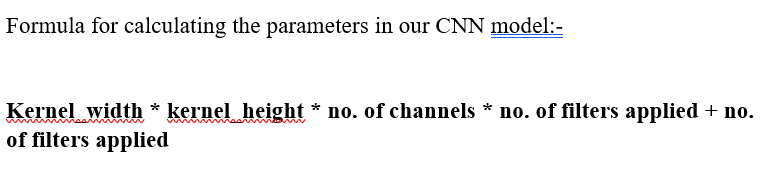

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0
y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)

In [18]:
model.compile(optimizer = 'adam',
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 72ms/step - accuracy: 0.8397 - loss: 0.4957 - val_accuracy: 0.9769 - val_loss: 0.0766
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9812 - loss: 0.0594 - val_accuracy: 0.9865 - val_loss: 0.0401
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9867 - loss: 0.0413 - val_accuracy: 0.9894 - val_loss: 0.0337
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9907 - val_loss: 0.0280
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9926 - loss: 0.0237 - val_accuracy: 0.9901 - val_loss: 0.0304
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9906 - val_loss: 0.0310
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9944 - loss: 0.0172 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9948 - loss: 0.0151 - 